
## 1.6 Homework

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.


## Q1. Downloading the data

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "Green Taxi Trip Records", we'll use "For-Hire Vehicle Trip Records".

Download the data for January and February 2021.

Note that you need "For-Hire Vehicle Trip Records", not "High Volume For-Hire Vehicle Trip Records".

Read the data for January. How many records are there?

* 1054112
* 1154112
* 1254112
* 1354112

In [4]:
!wget -O ./data/2021/green_tripdata_2021-01.parquet https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2021-01.parquet

--2022-05-22 20:10:02--  https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2021-01.parquet
Resolving s3.amazonaws.com... 54.231.225.160
Connecting to s3.amazonaws.com|54.231.225.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1333519 (1.3M) [binary/octet-stream]
Saving to: './data/2021/green_tripdata_2021-01.parquet'

./data/2021/green_t 100%[===================>]   1.27M  2.66MB/s    in 0.5s    

2022-05-22 20:10:03 (2.66 MB/s) - './data/2021/green_tripdata_2021-01.parquet' saved [1333519/1333519]



In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:


myList = np.linspace(1,10,5) # From Jan to Nov

for a in myList:
    os.system(f"wget -Onc ./data/2021/fhv_2021-0{a.astype(int)}.parquet \
        https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2021-0{a.astype(int)}.parquet")

--2022-05-22 20:10:03--  http://./data/2021/fhv_2021-01.parquet
Resolving .... failed: No address associated with hostname.
wget: unable to resolve host address '.'
--2022-05-22 20:10:03--  https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2021-01.parquet
Resolving s3.amazonaws.com... 54.231.131.136
Connecting to s3.amazonaws.com|54.231.131.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11886281 (11M) [binary/octet-stream]
Saving to: 'nc'

     0K .......... .......... .......... .......... ..........  0%  640K 18s
    50K .......... .......... .......... .......... ..........  0%  642K 18s
   100K .......... .......... .......... .......... ..........  1%  653K 18s
   150K .......... .......... .......... .......... ..........  1% 19.1M 13s
   200K .......... .......... .......... .......... ..........  2% 18.8M 11s
   250K .......... .......... .......... .......... ..........  2%  688K 12s
   300K .......... .......... .......... .......... .....

In [121]:
df_jan = pd.read_parquet(
   './data/2021/fhv_2021-01.parquet'
) 
df_feb = pd.read_parquet(
   './data/2021/fhv_2021-02.parquet'
) 

In [122]:
df_jan.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [123]:
## Reading amount of records in df_jan

df_jan.index

RangeIndex(start=0, stop=1154112, step=1)

Answer: 1154112


## Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes. 

What's the average trip duration in January?

* 15.16
* 19.16
* 24.16
* 29.16

In [124]:
# computing duration variable 
# 


df_jan['duration'] = df_jan.dropOff_datetime - df_jan.pickup_datetime

df_jan.duration = df_jan.duration.apply(lambda td: td.total_seconds()/60 ) # apply to every row with lambda

In [125]:
df_jan['PUlocationID']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
1154107      7.0
1154108     44.0
1154109    171.0
1154110     15.0
1154111      NaN
Name: PUlocationID, Length: 1154112, dtype: float64

In [126]:
df_jan['duration'].mean()

19.167224093791006

**Answer :** 19.16

## Data preparation

Check the distribution of the duration variable. There are some outliers. 

Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

How many records did you drop? 



In [127]:
df_jan['duration']

0           17.000000
1           17.000000
2          110.000000
3            8.283333
4           15.216667
              ...    
1154107      8.750000
1154108     57.600000
1154109     16.200000
1154110     19.433333
1154111     36.000000
Name: duration, Length: 1154112, dtype: float64

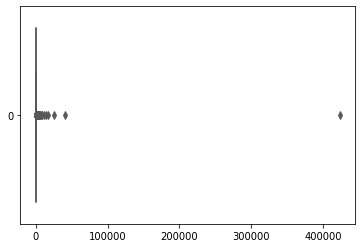

In [128]:
ax = sns.boxplot(data=df_jan['duration'],orient="h",palette="Set2")

In [15]:

df_count1  = df_jan.duration.count()

In [129]:
df_jan = df_jan[(df_jan.duration >= 1 )& (df_jan.duration <= 60)]

In [17]:
df_count2 = df_jan.duration.count()

In [60]:
df_count = df_count1 - df_count2 

print(df_count)

44286


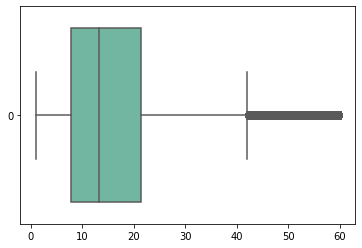

In [61]:

ax = sns.boxplot(data=df_jan['duration'],orient="h",palette="Set2")


## Q3. Missing values

The features we'll use for our model are the pickup and dropoff location IDs. 

But they have a lot of missing values there. Let's replace them with "-1".

What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs.


In [130]:
(df_jan['PUlocationID'].isnull().sum() * 100 / len(df_jan)).round(2)

83.53

Answer : 83 %

In [131]:
df_jan['PUlocationID'] = df_jan['PUlocationID'].fillna(-1)
df_jan['DOlocationID'] = df_jan['DOlocationID'].fillna(-1)


## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model. 

* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer 
* Get a feature matrix from it

What's the dimensionality of this matrix? (The number of columns).


In [132]:
## One hot encoding

from sklearn.feature_extraction import DictVectorizer


categorical = ['PUlocationID','DOlocationID']
numerical = ['duration']


In [133]:

df_jan[categorical] = df_jan[categorical].astype(str)

In [134]:

train_dict = df_jan[categorical].to_dict(orient="records")
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)


In [63]:
dv.feature_names_[:10]

['DOlocationID=-1.0',
 'DOlocationID=1.0',
 'DOlocationID=10.0',
 'DOlocationID=100.0',
 'DOlocationID=101.0',
 'DOlocationID=102.0',
 'DOlocationID=105.0',
 'DOlocationID=106.0',
 'DOlocationID=107.0',
 'DOlocationID=108.0']

In [135]:
X_train.shape

(1109826, 525)

Answer: 525 rows


## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model. 

* Train a plain linear regression model with default parameters 
* Calculate the RMSE of the model on the training data

What's the RMSE on train?


In [27]:
### SETUP TARGET 'Y'
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

target = 'duration'
y_train = df_jan[target].values
y_val = df_jan[target].values

In [28]:
X_train.shape,y_train.shape

((1109826, 525), (1109826,))

In [29]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_train)

mse(y_val,y_pred,squared=False)

10.528519425310185



## Q6. Evaluating the model

Now let's apply this model to the validation dataset (Feb 2021). 

What's the RMSE on validation?


In [136]:
def read_dataframe(filename):
    
    df = pd.read_parquet(filename)

    
    df['duration']  = df.dropOff_datetime - df.pickup_datetime # obtain duration by sustracting two dates
    df.duration = df.duration.apply(lambda td: td.total_seconds()/60 ) # apply to every row with lambda
    
    df = df[(df.duration >= 1 )& (df.duration <= 60)]
    categorical = ['PUlocationID','DOlocationID']

    
    return df

In [137]:
df_val = read_dataframe('./data/2021/fhv_2021-02.parquet')

In [138]:
df_val.shape

(990113, 8)

In [139]:
y_val = df_val[target].values

In [140]:

val_dict = df_val[categorical].to_dict(orient="records")

X_val = dv.transform(val_dict)

In [141]:
X_train.shape,X_val.shape

((1109826, 525), (990113, 525))

In [142]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_val)

mse(y_val,y_pred,squared=False)

12.853230419806742